# CSTR System

This notebook explores solutions to the system discussed in Seborg, Edgar, Melichamp & Doyle “Process Dynamics and Control” (3rd Ed).

![CSTR System](./img/cstr.png)

## Model

$$
\begin{align}
k &= k_0\exp\left(\frac{-E}{RT}\right)\\
w &=q\rho \\
V\frac{\mathrm{d}c_A}{\mathrm{d}t} &= q(c_{Ai} - c_A) - V k c_A \\
V\rho C\frac{\mathrm{d}T}{\mathrm{d}t} &= wC(T_i - T) + (-\Delta H_R) V k c_A + UA(T_c - T)
\end{align}
$$

EB:

$$
\frac{dE}{dt} = E_{in} - E_{out}

$$

MB:

$$
\frac{dm}{dt} = \dot m_{in} - \dot m_{out}

$$

CB:


$$

\frac{dN_A}{dt} = N_{A,in} - N_{A, out} + N_{A, \text{gen}} - N_{A, \text{consumed}}

$$

In [13]:
import numpy
import scipy, scipy.optimize, scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
q = 100  # L/min
cA_i = 1  # mol/L
T_i = 350  # K
V = 100  # L
rho = 1000 # g/L
C = 0.239 # J/(g K)
Hr = -5e4  # J/(g K)
E_over_R = 8750  # K
k0 = 7.2e10  # 1/min
UA = 5e4  # J/(min K)

In [4]:
Tc = Tc0 = 300  # K

In [5]:
cA0 = 0.5  # mol/L
T0 = 350  # K

In [6]:
def intsys(t, x):
    cA, T = x
    k = k0*numpy.exp(-E_over_R/T)
    w = q*rho
    dcAdt = q*(cA_i - cA)/V - k*cA
    dTdt = 1/(V*rho*C)*(w*C*(T_i - T) - Hr*V*k*cA + UA*(Tc - T))
    return dcAdt, dTdt

In [7]:
x0 = [cA0, T0]

In [8]:
intsys(0, x0)

(3.40208612952253e-05, -0.007117334999003795)

In [9]:
tspan = (0, 10)
t = numpy.linspace(*tspan, 1000)

In [10]:
def simulate():
    r = scipy.integrate.solve_ivp(intsys, tspan, x0, t_eval=t)
    return r.y

In [11]:
cA, T = simulate()

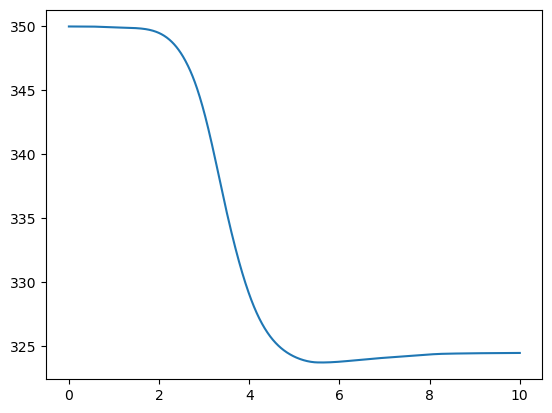

In [14]:
plt.plot(t, T)
plt.show()